In [41]:
import torch

x= torch.Tensor([5,3])
y= torch.Tensor([2,1])

print(x*y)

tensor([10.,  3.])


In [42]:
x.shape

torch.Size([2])

In [43]:
#for random intialization of a tensor 
# use rand function with x,y as x and y as the rows and columns 
z=torch.rand([2,4])
print(z)

tensor([[0.0462, 0.0681, 0.3242, 0.7186],
        [0.5209, 0.5578, 0.8094, 0.5374]])


In [44]:
# we will have to flatten out the torch for passing it through the neural network thus we will use the view function
#We will specify the column size and the row size will always be 1
z=z.view([1,8])
print(z)

tensor([[0.0462, 0.0681, 0.3242, 0.7186, 0.5209, 0.5578, 0.8094, 0.5374]])


DATA WITH TORCH AND TORCHVISION

In [45]:
import torchvision
from torchvision import transforms, datasets


In [46]:
#Data is not in a tensor when we use torchvision thus we have to use transform to tensor function.
train= datasets.MNIST("",download=True, train=True, transform=transforms.Compose([transforms.ToTensor()]))

test= datasets.MNIST("",download=True, train=False, transform=transforms.Compose([transforms.ToTensor()]))

In [47]:
import torch.utils

#batchsize will take in the number of data from the dataset for taking in less data from dataset. It also helps in generalization.

#shuffle is good for generalising the data rather then the network doing some tricks
trainset=torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset= torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [48]:
#This will print the data of the first batch, thus the tensor version of the first 10 elements and the first 10 numbers/elements are written below
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [49]:
#taking the first element and printing the true element
x,y= data[0][0], data[1][0]
print(y)
print(data[0][0].shape)

tensor(9)
torch.Size([1, 28, 28])


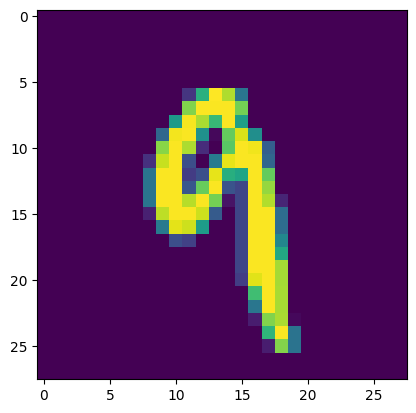

In [50]:
import matplotlib.pyplot as plt

plt.imshow(data[0][0].view(28,28))

In [51]:
import torch.nn as nn
import torch.nn.functional as F

#funtional is used as parameter passing

class Net(nn.Module):

    def __init__(self):
        super().__init__()
        #adding layers to the network
        #nn.linear(input, output) each layer has its input and its output
        #the input will be a 28 by 28 (784 as implied by pytorch)
        self.fc1 = nn.Linear(28*28, 64)
        #layer 2 takes in the output of layer 1 as the input and the output is whatever we want to be. For uniformality we will go with 64
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        #for the last layer the output is the class size which is 10 as it signifies 0-9 which is our output.
        self.fc4 = nn.Linear(64, 10)

    # a simplle neural network is just a feed forward NN. It just takes in the data feeds to the neuron and forwards it to the next neuron in a single direction    
    def forward(self, x):
        x= F.relu(self.fc1(x))
        x= F.relu(self.fc2(x))
        x= F.relu(self.fc3(x))
        x= self.fc4(x)
        return F.log_softmax(x, dim=1)
        return x


net= Net()
print(net)


Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [52]:
X= torch.rand((28*28))
X=X.view(-1,28*28)

In [53]:
output= net(X)
print(output)


tensor([[-2.2686, -2.3122, -2.2219, -2.2125, -2.3760, -2.3086, -2.3269, -2.2641,
         -2.4515, -2.3060]], grad_fn=<LogSoftmaxBackward0>)


In [54]:
import torch.optim as optim

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [55]:
for epoch in range(3): # 3 full passes over the data
    for data in trainset:  # `data` is a batch of data
        X, y = data  # X is the batch of features, y is the batch of targets.
        net.zero_grad()  # sets gradients to 0 before loss calc. You will do this likely every step.
        output = net(X.view(-1,784))  # pass in the reshaped batch (recall they are 28x28 atm)
        loss = F.nll_loss(output, y)  # calc and grab the loss value
        loss.backward()  # apply this loss backwards thru the network's parameters
        optimizer.step()  # attempt to optimize weights to account for loss/gradients
    print(loss)  # print loss. We hope loss (a measure of wrong-ness) declines! 
        

tensor(0.6961, grad_fn=<NllLossBackward0>)
tensor(0.0267, grad_fn=<NllLossBackward0>)
tensor(0.0013, grad_fn=<NllLossBackward0>)


In [56]:
correct=0
total=0

with torch.no_grad():
    for data in trainset:
        X, y = data 
        output= net(X.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct+=1
            total+=1

print("Accuracy:", round(correct/total,3))

Accuracy: 0.968


<function matplotlib.pyplot.show(close=None, block=None)>

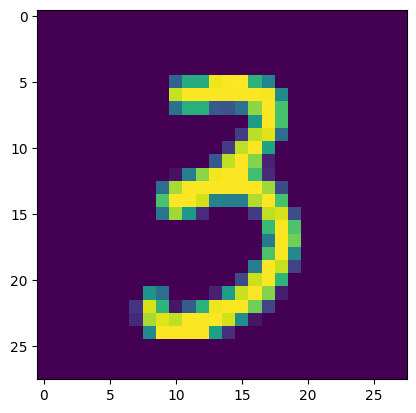

In [66]:
import matplotlib.pyplot as plt
plt.imshow(X[2].view(28,28))
plt.show

In [67]:
print(torch.argmax(net(X[2].view(-1,784))[0]))

tensor(3)
